# Use scipy to perform more complicated fits

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
%matplotlib inline

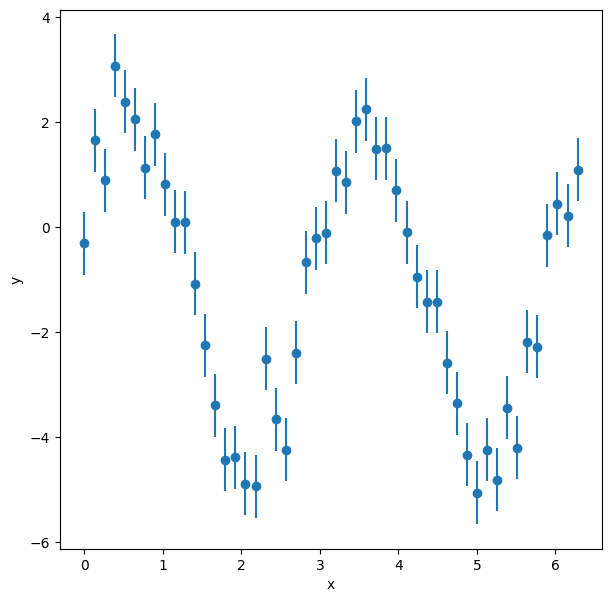

In [2]:
#define x and y
npoints = 50
x = np.linspace(0, 2*np.pi, npoints)

#make y a complicated function with 4 parameters (a, b, c, d)
a = 3.4
b = 2.1
c = 0.27
d = -1.3

#randomness
sigma = 0.6
np.random.seed(120)

#create y and y error
y = a * np.sin(b*x+c) + d + np.random.normal(scale=sigma, size=npoints)
y_err = np.full(npoints, sigma)

#make the plot
f = plt.figure(figsize=(7, 7))
plt.errorbar(x, y, y_err, fmt='o')
plt.xlabel('x')
plt.ylabel('y')
# plt.show()

In [6]:
#define the function to fit
def f_line(x, a, b, c, d):
    return a * np.sin(b*x + c) + d

#perform the fit
params, params_cov = optimize.curve_fit(f_line, x, y, sigma=y_err, p0=[1., 2., 0.1, -0.1])

a_fit = params[0]
b_fit = params[1]
c_fit = params[2]
d_fit = params[3]

print(a_fit, b_fit, c_fit, d_fit)

y_fit = f_line(x, a_fit, b_fit, c_fit, d_fit)

3.3013507831157547 2.0879754693937485 0.3425958898458357 -1.1947313142391118


In [ ]:
perr = np.sqrt(np.diag(params_cov)) #extract the diagonal, apply square root



Plot the fit

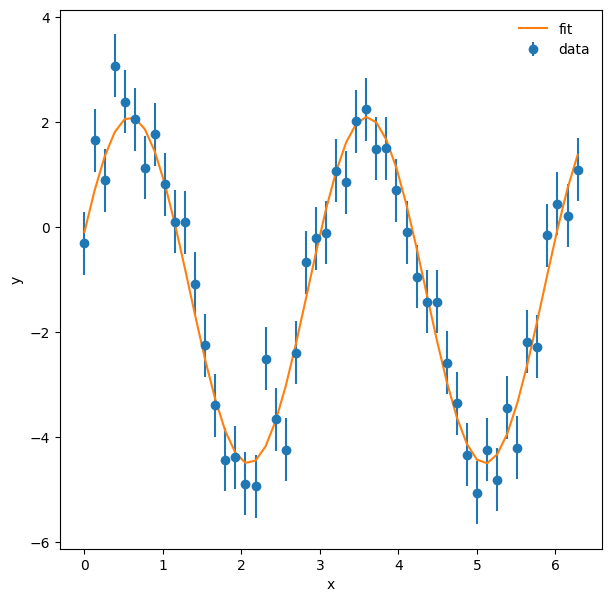

In [7]:
f = plt.figure(figsize=(7, 7))
plt.errorbar(x, y, yerr=y_err, fmt='o', label='data')
plt.plot(x, y_fit, label='fit')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc=0, frameon=False)